In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import joblib

In [21]:
def run():
    # Set random seed
    rseed = 786

    # Load data
    X, y = load_iris(return_X_y=True)
    feature_names = load_iris()['feature_names']
    target_names = load_iris()['target_names']

    # Create train test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rseed)

    # Declare model
    clf = RandomForestClassifier(random_state=rseed)

    # Fit model
    clf.fit(X_train, y_train)

    # Save model
    joblib.dump(clf, 'model/model.pkl')
    
    # Make predictions
    y_preds = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = round(accuracy_score(y_test, y_preds), 2)
    precision = round(precision_score(y_test, y_preds, average='weighted'), 2)
    recall = round(recall_score(y_test, y_preds, average='weighted'), 2)
    
    # Plot model results
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title('Confusion Matrix')
    
    plt.savefig('model/confusion_matrix.png')
    
    # Plot feature importance
    pd.DataFrame.from_dict({'Features': feature_names, 'Importance': clf.feature_importances_}) \
        .sort_values('Importance', ascending=True) \
        .set_index('Features') \
        .plot(kind='barh', title='Feature Importance')
    plt.savefig('model/feature_importance.png')
    
    # Print model performance
    results = 'Model Results\nAccuracy: {}\nPrecision: {}\nRecall: {}'.format(accuracy, precision, recall)
    original_stdout = sys.stdout # Save a reference to the original standard output
    with open('model/metrics.txt', 'w') as f:
        sys.stdout = f # Change the standard output to the file we created.
        print(results)
        sys.stdout = original_stdout # Reset the standard output to its original value
    print(results)

Model Results
Accuracy: 0.89
Precision: 0.9
Recall: 0.89


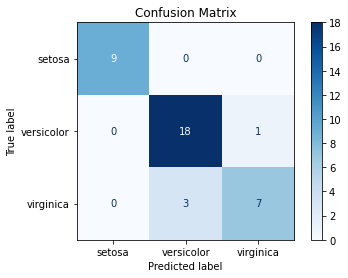

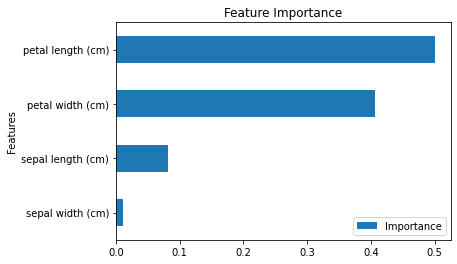

In [22]:
if __name__=='__main__':
    run()